# 2023 MLB Player Hitting Statistics
**Name**: [Jake Rood](https://github.com/jakerood)

**Date**: 10-01-2023

In this project, I use Python to evaluate MLB player-hitting statistics from the 2023 season. Statistics were acquired from [FanGraphs](fangraphs.com).

## 1 - LOAD

In [1]:
# Import pandas
import pandas as pd

# Set the display precision to three decimal places
pd.set_option("display.precision", 3)

# Load the mlb-player-hitting-2023.csv dataset into a DataFrame
hitting = pd.read_csv('mlb-player-hitting-2023.csv', index_col=0)

## 2 - VIEW

In [2]:
# View the first five rows of the DataFrame
hitting.head()

,Name,Team,Age,G,PA,AB,H,BB,HBP,HR,R,RBI,SB,OBP,SLG,wOBA,wRC+,WAR
PlayerId,,,,,,,,,,,,,,,,,,
18401,Ronald Acuña Jr.,ATL,25,158,734,642,217,80,9,41,149,106,73,0.417,0.597,0.428,170.626,8.283
13611,Mookie Betts,LAD,30,151,689,581,178,95,8,39,126,107,14,0.408,0.580,0.417,166.581,8.187
5361,Freddie Freeman,LAD,33,160,725,633,211,72,15,29,131,102,23,0.411,0.570,0.412,163.786,7.922
19755,Shohei Ohtani,LAA,28,135,599,497,151,91,3,44,102,95,20,0.412,0.654,0.433,179.538,6.619
14344,Matt Olson,ATL,29,161,719,607,171,104,4,54,127,137,1,0.388,0.603,0.412,159.843,6.618


In [3]:
# View the last five rows of the DataFrame
hitting.tail()

,Name,Team,Age,G,PA,AB,H,BB,HBP,HR,R,RBI,SB,OBP,SLG,wOBA,wRC+,WAR
PlayerId,,,,,,,,,,,,,,,,,,
14111,Eric Haase,- - -,30,89,293,274,55,17,0,4,22,26,4,0.247,0.281,0.233,42.097,-1.376
20970,Oscar Gonzalez,CLE,25,53,177,170,37,5,1,2,15,12,0,0.243,0.318,0.243,51.511,-1.381
10472,Enrique Hernández,- - -,31,139,504,461,109,34,3,10,56,58,4,0.290,0.351,0.280,70.975,-1.407
14691,Harold Castro,COL,29,99,270,258,65,9,0,1,24,31,1,0.275,0.314,0.258,43.043,-1.568
10815,Jurickson Profar,- - -,30,124,516,454,109,50,6,9,55,45,1,0.320,0.368,0.304,75.478,-1.938


## 3 - DESCRIBE

Let's begin the analysis by calculating basic descriptive statistics for the different hitting metrics in the dataset.

In [4]:
# Calculate basic descriptive statistics for all numeric columns
# Use the DataFrame describe method
hitting.describe()

,Age,G,PA,AB,H,BB,HBP,HR,R,RBI,SB,OBP,SLG,wOBA,wRC+,WAR
count,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000,656.000
mean,27.767,76.956,278.928,249.108,61.916,23.965,3.195,8.904,34.012,32.636,5.294,0.296,0.368,0.291,81.536,0.864
std,3.766,50.174,215.782,191.890,52.130,22.714,3.968,9.672,29.854,29.397,8.644,0.083,0.132,0.084,55.274,1.604
min,19.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-100.000,-1.938
25%,25.000,29.000,80.000,72.750,15.000,5.000,0.000,1.000,8.000,7.000,0.000,0.270,0.310,0.263,62.475,-0.159
50%,27.000,76.000,244.500,217.500,50.000,17.000,2.000,5.000,26.000,26.000,2.000,0.306,0.378,0.300,86.653,0.265
75%,30.000,122.250,453.000,401.000,101.250,36.000,5.000,14.000,56.000,51.000,6.000,0.333,0.444,0.334,110.209,1.588
max,42.000,161.000,749.000,666.000,217.000,131.000,34.000,54.000,149.000,137.000,73.000,1.000,1.000,0.882,474.984,8.283


The descriptive statistics calculated for age give us context to the age of Major League Baseball hitters. We can see that the average age is 27.77 years old. This makes sense as a player's mid-late 20's are generally considered to be the age where MLB hitters reach their peak. We can also see there is a wide overall age range, with hitters as young as 19 years old and as old as 42 years old.

## 4 - SERIES

In [5]:
# Calculate descriptive stats for all categorial columns
# The dataset has just two such columns: Name and Team
# Use the Series method describe()

# Name
hitting.Name.describe()

count              656
unique             655
top       Carlos Pérez
freq                 2
Name: Name, dtype: object

In [6]:
# Team
hitting.Team.describe()

count       656
unique       31
top       - - -
freq         51
Name: Team, dtype: object

There are 31 unique values for Team. There are only 30 total teams in Major League Baseball, so how can there be 31 unique values? The answer lies with what the descriptive statistics show as the top value for Team in our dataset. The "- - -" value is used for hitters who played for more than one team during the season, which is why we get the 31 total unique values for Team. 51 hitters played for multiple teams in 2023.

## 5 - UNIQUE

In [7]:
# Get the unique category values
# Use the Series method unique()

# Name
hitting.Name.unique()

array(['Ronald Acuña Jr.', 'Mookie Betts', 'Freddie Freeman',
       'Shohei Ohtani', 'Matt Olson', 'Marcus Semien', 'Corey Seager',
       'Julio Rodríguez', 'Corbin Carroll', 'Francisco Lindor',
       'Bobby Witt Jr.', 'Juan Soto', 'William Contreras', 'Aaron Judge',
       'José Ramírez', 'Austin Riley', 'Adley Rutschman',
       'Dansby Swanson', 'Luis Robert Jr.', 'Kyle Tucker',
       'J.P. Crawford', 'Adolis García', 'Gunnar Henderson', 'Yandy Díaz',
       'Cal Raleigh', 'Nico Hoerner', 'Wander Franco', 'Yordan Alvarez',
       'Ha-Seong Kim', 'Brandon Nimmo', 'Xander Bogaerts',
       'Fernando Tatis Jr.', 'Isaac Paredes', 'TJ Friedl', 'James Outman',
       'Will Smith', 'Sean Murphy', 'Ketel Marte', 'Alex Bregman',
       'Cody Bellinger', 'Jonah Heim', 'Jose Altuve', 'Ozzie Albies',
       'Christian Yelich', 'Chas McCormick', 'Michael Harris II',
       'Thairo Estrada', 'Trea Turner', 'Christian Walker', 'Bo Bichette',
       'Josh Lowe', 'Andrés Giménez', 'Bryson Stott'

In [8]:
# Team
hitting.Team.unique()

array(['ATL', 'LAD', 'LAA', 'TEX', 'SEA', 'ARI', 'NYM', 'KCR', 'SDP',
       'MIL', 'NYY', 'CLE', 'BAL', 'CHC', 'CHW', 'HOU', 'TBR', 'CIN',
       'SFG', 'PHI', 'TOR', 'STL', 'MIA', 'COL', '- - -', 'PIT', 'BOS',
       'OAK', 'MIN', 'WSN', 'DET'], dtype=object)

Here we can see the 30 different teams in Major League Baseball, as well as the "- - -" indicating a player played for more than one team during the 2023 season.

## 6 - HISTOGRAMS
Now let's continue the analysis by generating histograms for the different hitting metrics in the dataset.

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'PA'}>, <Axes: title={'center': 'AB'}>],
       [<Axes: title={'center': 'H'}>, <Axes: title={'center': 'BB'}>,
        <Axes: title={'center': 'HBP'}>, <Axes: title={'center': 'HR'}>],
       [<Axes: title={'center': 'R'}>, <Axes: title={'center': 'RBI'}>,
        <Axes: title={'center': 'SB'}>, <Axes: title={'center': 'OBP'}>],
       [<Axes: title={'center': 'SLG'}>,
        <Axes: title={'center': 'wOBA'}>,
        <Axes: title={'center': 'wRC+'}>,
        <Axes: title={'center': 'WAR'}>]], dtype=object)

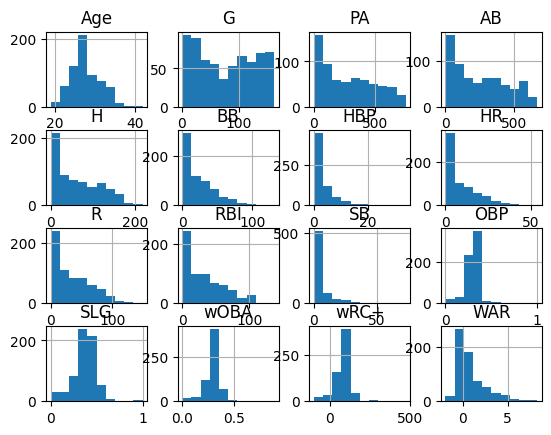

In [9]:
# Create a histogram for each numerical column
# First, enable Matplotlib
%matplotlib inline

# Next, call the DataFrame's hist function()
hitting.hist()

One thing that stands out to me is the histograms for the different counting statistics such as PA, H, and HR. We can see that a vast majority of hitters are closer to zero for these statistics. There are only 270 starting spots in the league (9 starting spots on 30 teams), but 656 hitters in the dataset. It makes sense then that a lot of these players saw limited playing time, likely getting called up from the minor leagues to serve as an injury replacement for a short stint before being sent back down. The histogram for age also reemphasizes that hitters usually reach their peak in their mid-late 20's, as it shows that the most hitters are in that age range.

## 7 - LIST
If you watch enough baseball during the season, eventually you're going to see "Jr." on the back of some player's jersey. Let's create a new list of the hitters in MLB this season who have "Jr." in their name.

In [10]:
# Create a new list with all hitters who have "Jr." in their name
jr_list = [item for item in hitting.Name if "Jr." in item]

In [11]:
jr_list

['Ronald Acuña Jr.',
 'Bobby Witt Jr.',
 'Luis Robert Jr.',
 'Fernando Tatis Jr.',
 'LaMonte Wade Jr.',
 'Lourdes Gurriel Jr.',
 'Jazz Chisholm Jr.',
 'Vladimir Guerrero Jr.',
 'Jackie Bradley Jr.']

## 8 - FILTER
Now let's concern our analysis only with statistics dealing with times a player reaches base.

In [12]:
# View only the players' names, hits, walks, and hit by pitches
hitting.filter(items=['Name', 'H', 'BB', 'HBP'])

,Name,H,BB,HBP
PlayerId,,,,
18401,Ronald Acuña Jr.,217,80,9
13611,Mookie Betts,178,95,8
5361,Freddie Freeman,211,72,15
19755,Shohei Ohtani,151,91,3
14344,Matt Olson,171,104,4
...,...,...,...,...
14111,Eric Haase,55,17,0
20970,Oscar Gonzalez,37,5,1
10472,Enrique Hernández,109,34,3


## 9 - MAP

In [13]:
# Calculate how many times a player successfully reached base
# Use the built-in map() function calculate times on base
# Add hits, walks and hit by pitches
onbase = map(lambda x, y, z: x + y + z, hitting.H, hitting.BB, hitting.HBP)

In [14]:
print(list(onbase))

[306, 281, 298, 245, 279, 262, 209, 238, 231, 230, 219, 289, 223, 186, 245, 245, 255, 209, 186, 244, 241, 206, 201, 246, 174, 238, 169, 200, 218, 247, 232, 204, 198, 193, 198, 196, 160, 233, 261, 198, 158, 160, 217, 232, 161, 176, 166, 221, 220, 202, 167, 192, 206, 249, 249, 192, 192, 242, 238, 195, 233, 184, 163, 192, 219, 163, 144, 208, 223, 173, 229, 133, 192, 201, 101, 244, 100, 209, 143, 153, 212, 170, 180, 202, 120, 97, 120, 193, 135, 162, 162, 78, 152, 215, 211, 166, 161, 173, 89, 135, 177, 125, 170, 153, 146, 172, 211, 145, 147, 223, 96, 127, 127, 103, 192, 177, 154, 184, 164, 156, 261, 159, 181, 131, 237, 179, 135, 116, 181, 194, 169, 166, 94, 151, 198, 124, 117, 138, 152, 107, 94, 54, 158, 80, 124, 188, 115, 207, 157, 129, 184, 77, 169, 70, 197, 143, 150, 154, 141, 101, 107, 117, 176, 118, 171, 127, 115, 99, 118, 137, 179, 75, 247, 156, 167, 129, 212, 130, 53, 135, 75, 132, 216, 148, 202, 179, 109, 92, 156, 123, 179, 163, 71, 181, 105, 156, 88, 182, 116, 62, 102, 94, 48, 54, 

The most times any hitter reached base was 306, which was by the favorite to win the National League Most Valuable Player award, Ronald Acuña Jr.

## SUMMARY
From the analysis of MLB player-hitting statistics for the 2023 season, I found the following interesting results:

* The average age of MLB hitters in 2023 is 28.1 years old
* 51 hitters played for multiple teams in 2023
* 9 hitters have "Jr." in their name
* The most times any hitter reached base was 306 times